Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# help utilites 
def write_result_2_csv( file_nm, file_nm_res, y_pred ):
    df = pd.read_csv(file_nm)
    df[df.columns[-1]] = y_pred
    df.to_csv(file_nm_res, sep=',', index=None, encoding='utf-8')

# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(y_pred, y_true):
    return (sum((y_true - y_pred)**2)/ len(y))    
    
def r2_score_(y_pred, y_true):
    return 1 - (np.sum((y_pred - y_true)**2)) / (np.sum((y_pred - np.mean(y_true))**2))

    

In [5]:
df = pd.read_csv('tutors-expected-math-exam-results/train.csv')
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [7]:
df_test= pd.read_csv('tutors-expected-math-exam-results/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [8]:
tgt_nm = df.columns[-1]

row_num = len(df)
y = df[tgt_nm][:row_num].to_numpy()
y = y.reshape(len(y), 1)
X = df.loc[:row_num-1, df.columns[1:-1]].to_numpy()
test_X = df_test.loc[:row_num-1, df_test.columns[1:]].to_numpy()

In [9]:
# split for learning
trn_x, val_x, trn_y, val_y = train_test_split(X, y, test_size=0.25)

In [10]:
# решение только для mse  O(колич.признаков^3)
W = np.linalg.inv(np.dot(X.T,X)) @ X.T @ y
W

array([[0.50924797],
       [0.19438164],
       [0.01427329],
       [7.35715911],
       [6.36555615],
       [1.26278512],
       [2.1159237 ],
       [2.31825251],
       [1.06574434],
       [0.54044291]])

In [11]:
y_pred = np.dot(val_x, W)

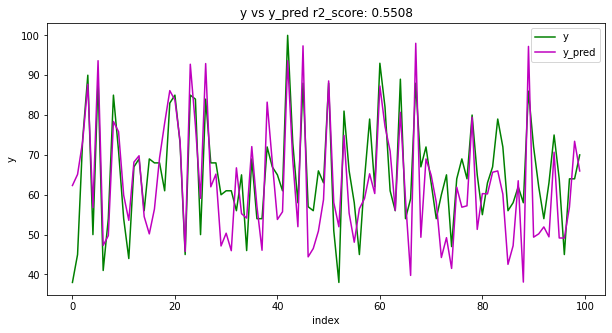

In [12]:
x_lim = 100
plt.figure(figsize=(10, 5))
plt.title(f'y vs y_pred r2_score: {round(r2_score_( y_pred, val_y), 4)}')
plt.xlabel(r'index')
plt.ylabel(r'y')
plt.plot(range(x_lim), val_y[:x_lim], 'g-', label = f'y')
plt.plot(range(x_lim), y_pred[:x_lim], 'm-', label = f'y_pred')
plt.legend(loc='best')
plt.show()

In [13]:
write_result_2_csv( 'tutors-expected-math-exam-results/submission_example.csv', 
                   'tutors-expected-math-exam-results/submission_pred.csv', np.dot(test_X, W) )